# Noise Sweep

### Fixed Hyperparams

In [ ]:
# Namespace(activation='sigmoid', batch_size=4, learning_rate=0.1,
#n_epochs=1000, n_hidden=150, n_visible=100, output=None, reg_lambda=0.001, regularization='normal')
ACTIVATION = 'sigmoid'
BATCH_SIZE = 2
LEARNING_RATE = 0.1
N_EPOCHS = 1250
N_HIDDEN = 150
N_VISIBLE = 100
OUTPUT = None
REG_LAMBDA = 0.001
REGULARIZATION = 'normal'

: 

### Imports

In [28]:
from rbm import *

### Generate Base Data

In [29]:
data = generate_numerals()

print(f"Shape of data: {data.shape}")

Shape of data: (8, 100)


In [41]:
np.arange(0.0, 0.2, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [42]:
noise_levels = np.arange(0.0, 1.0, 0.1)
# for noise_level in noise_levels:
#     noisy_data.append(add_custom_noise(data, noise_level=noise_level))  # Reduced noise level

### Create the RBM for each Noise Level

In [43]:
def get_accuracy(data, reconstructed_data, threshold=30):
    correct_reconstructions = 0
    for i in range(len(data)):
        distance = hamming_distance(data[i], reconstructed_data[i])
        if distance <= threshold:
            correct_reconstructions += 1

    accuracy = correct_reconstructions / len(data) * 100
    return accuracy

In [47]:
def calculate_var(original, reconstructed):
    """Calculate the mean squared error between original and reconstructed data."""
    return np.var((original - reconstructed) ** 2)

In [54]:
def free_energy(v, W, vbias, hbias):
    """
    Compute the free energy of visible vector(s) v in an RBM.

    Parameters:
    - v: shape (batch_size, n_visible)
    - W: shape (n_visible, n_hidden)
    - vbias: shape (n_visible,)
    - hbias: shape (n_hidden,)

    Returns:
    - Free energy for each sample in the batch, shape (batch_size,)
    """
    linear_term = np.dot(v, vbias)
    hidden_term = np.dot(v, W) + hbias  # shape: (batch_size, n_hidden)
    hidden_term_logsum = np.sum(np.log1p(np.exp(hidden_term)), axis=1)  # log(1 + exp(x))
    return -linear_term - hidden_term_logsum

def free_energy_gap(v, W, vbias, hbias):
    energies = free_energy(v, W, vbias, hbias)
    return np.max(energies) - np.min(energies)


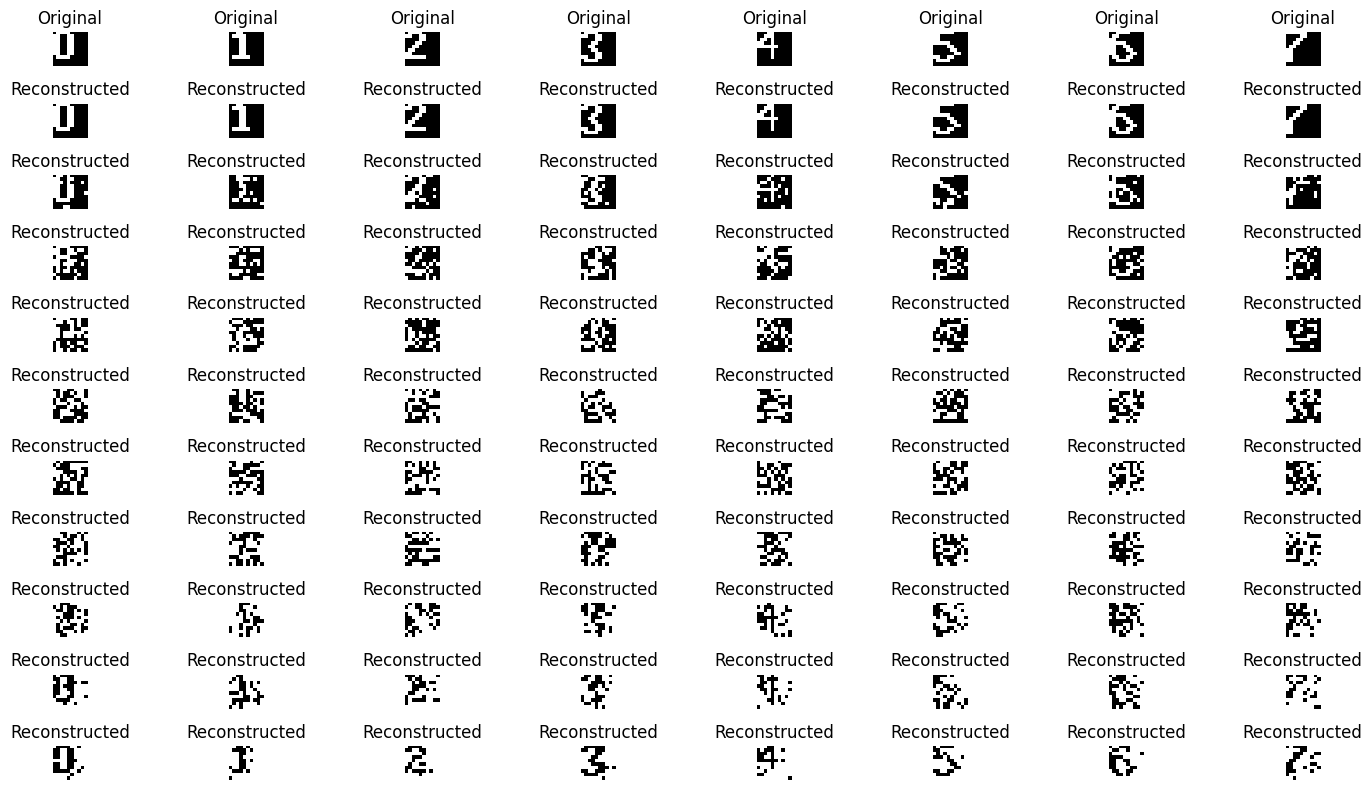

In [62]:
errors = []
accs = []
variances = []
free_energies = []
rbms = []

logging.disable(logging.INFO)

fig, axes = plt.subplots(1 + len(noise_levels), 8, figsize=(15, 8))
for i in range(8):
    axes[0, i].imshow(data[i].reshape(10, 10), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

for j, noise_level in enumerate(noise_levels):
    noisy_data = add_custom_noise(data, noise_level=noise_level)
    rbm = RestrictedBoltzmannMachine(
        n_visible=N_VISIBLE,
        n_hidden=N_HIDDEN,
        learning_rate=LEARNING_RATE,
        n_epochs=N_EPOCHS,
        batch_size=BATCH_SIZE,
        activation=ACTIVATION,
        regularization=REGULARIZATION,
        reg_lambda=REG_LAMBDA
    )
    rbm.train(noisy_data)
    
    rbms.append(rbm)
    
    # Visualize original, noisy, and reconstructed data
    reconstructed_data = rbm.reconstruct(noisy_data)
    reconstructed_data = binarize_data(reconstructed_data)
    
    # Calculate and display reconstruction error
    reconstruction_error = calculate_reconstruction_error(data, reconstructed_data)
    accuracy = get_accuracy(data, reconstructed_data)
    var = calculate_var(data, reconstructed_data)
    free_energy_gap_lvl = free_energy_gap(data, rbm.weights,
                                          rbm.visible_bias, rbm.hidden_bias)
    
    
    errors.append(reconstruction_error)
    accs.append(accuracy)
    variances.append(var)
    free_energies.append(free_energy_gap_lvl)
    
    for i in range(8):
        axes[1+j, i].imshow(reconstructed_data[i].reshape(10, 10), cmap='gray')
        axes[1+j, i].set_title(f"Reconstructed")
        axes[1+j, i].axis('off')

plt.tight_layout()
plt.show()
    

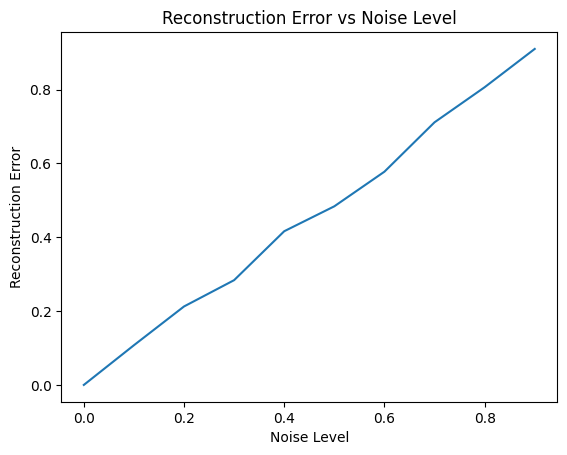

In [63]:
plt.plot(noise_levels, errors)
plt.title("Reconstruction Error vs Noise Level")
plt.xlabel("Noise Level")
plt.ylabel("Reconstruction Error");

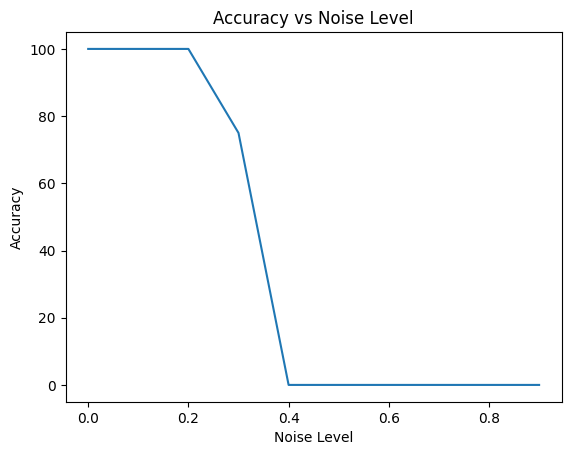

In [64]:
plt.plot(noise_levels, accs)
plt.title("Accuracy vs Noise Level")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy");

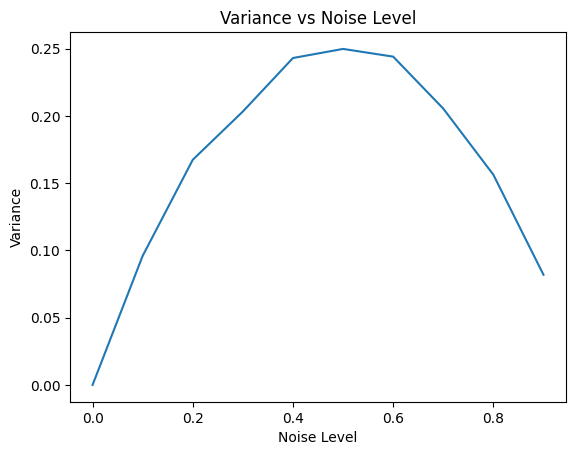

In [65]:
plt.plot(noise_levels, variances)
plt.title("Variance vs Noise Level")
plt.xlabel("Noise Level")
plt.ylabel("Variance");

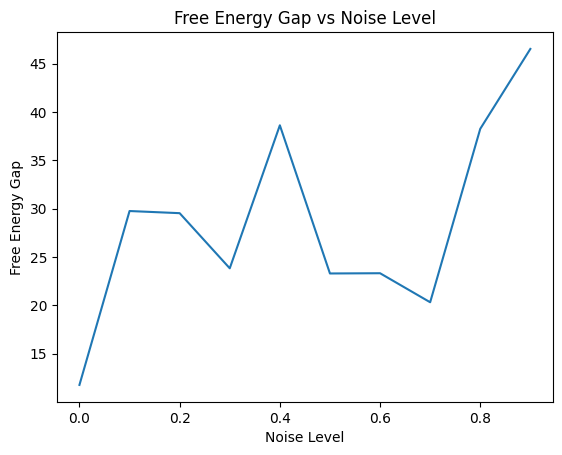

In [66]:
plt.plot(noise_levels, free_energies)
plt.title("Free Energy Gap vs Noise Level")
plt.xlabel("Noise Level")
plt.ylabel("Free Energy Gap");

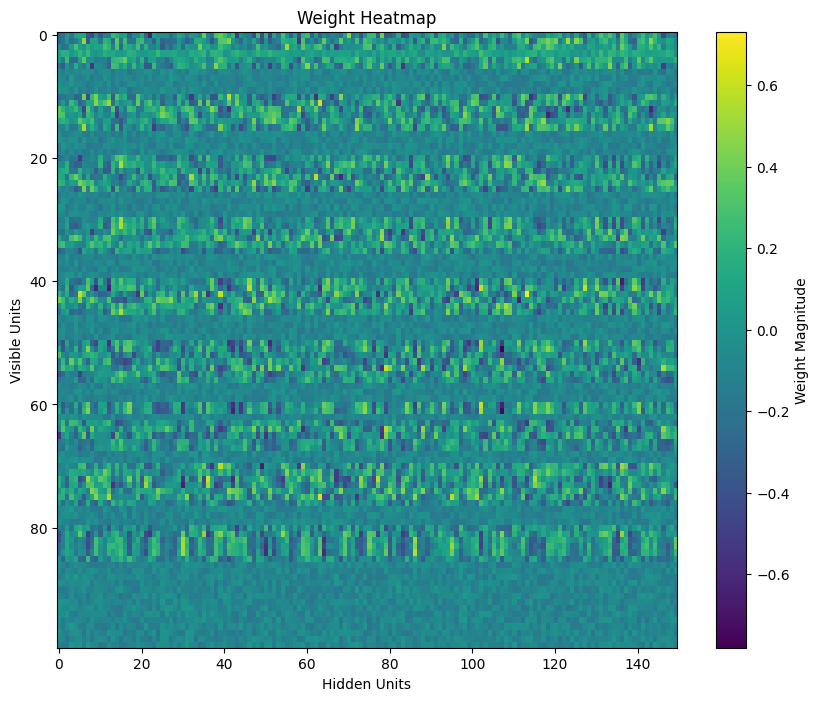

In [67]:
rbms[0].visualize_weights()

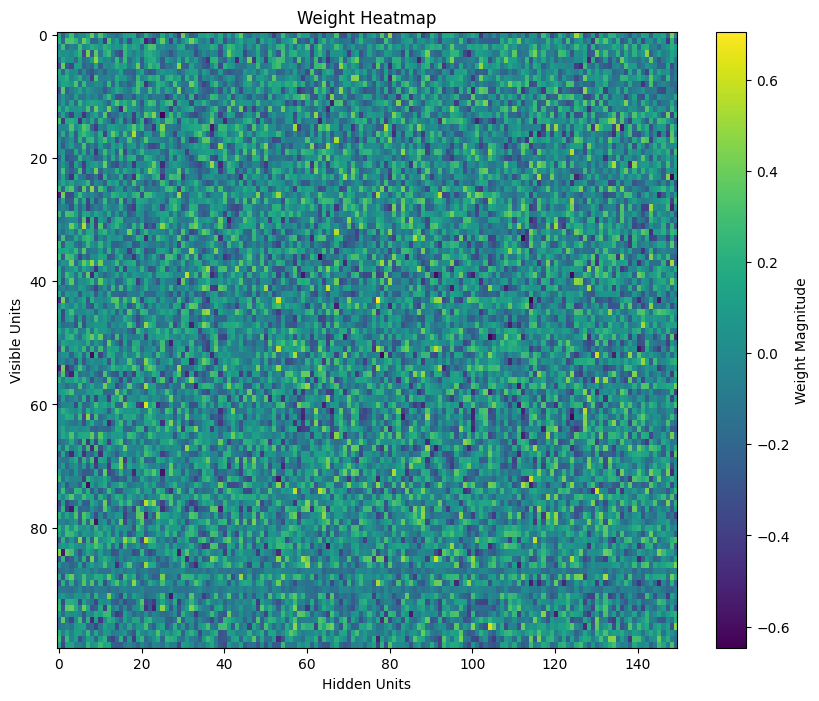

0.5


In [70]:
rbms[len(rbms) // 2].visualize_weights()
print(noise_levels[len(rbms) // 2])

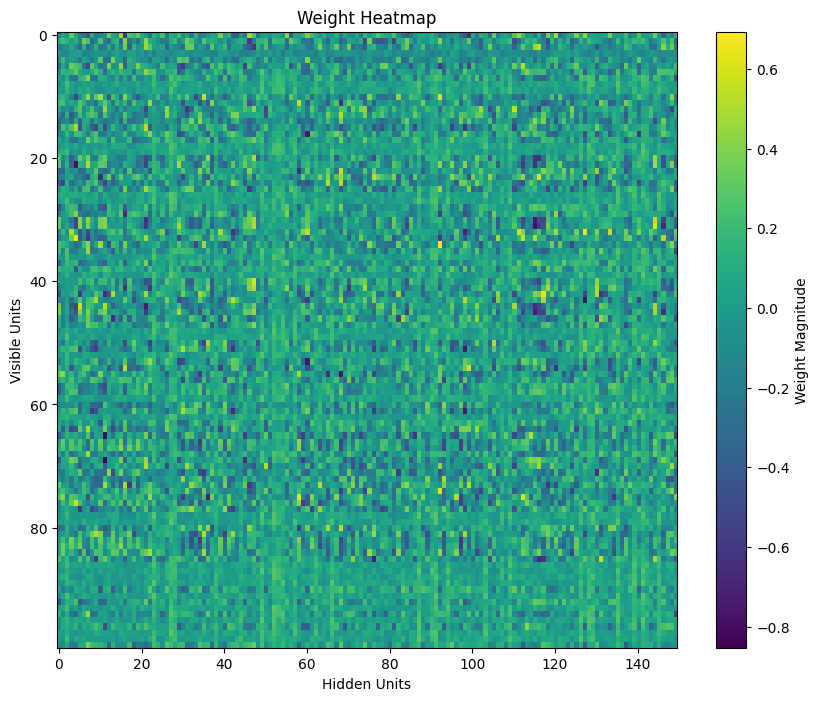

In [68]:
rbms[-1].visualize_weights()

In [71]:
for digit in data:
    good_rbm = rbms[1]
    good_rbm

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
